# FACE MASK DETECTION

In [69]:
!pip install opencv-python


In [70]:
import cv2
import numpy as np


In [71]:
img = cv2.imread('xyz.jpg')
print(img)


[[[184 164 159]
  [184 164 159]
  [184 164 159]
  ...
  [141 146 171]
  [141 146 171]
  [141 146 171]]

 [[184 164 159]
  [184 164 159]
  [184 164 159]
  ...
  [141 146 171]
  [141 146 171]
  [141 146 171]]

 [[184 164 159]
  [184 164 159]
  [184 164 159]
  ...
  [141 146 171]
  [141 146 171]
  [141 146 171]]

 ...

 [[142 132 132]
  [142 132 132]
  [142 132 132]
  ...
  [225 222 218]
  [225 222 218]
  [225 222 218]]

 [[142 132 132]
  [142 132 132]
  [142 132 132]
  ...
  [225 222 218]
  [225 222 218]
  [225 222 218]]

 [[142 132 132]
  [142 132 132]
  [142 132 132]
  ...
  [225 222 218]
  [225 222 218]
  [225 222 218]]]


In [72]:
img.shape

(600, 900, 3)

In [73]:
import matplotlib.pyplot as plt

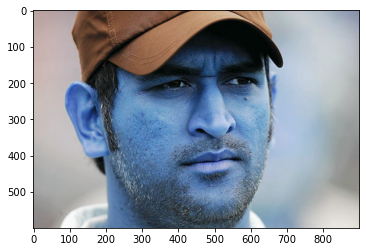

In [74]:
plt.imshow(img)

In [75]:
while True:
    cv2.imshow('result' , img)
    if cv2.waitKey(2) == 27:
        #here 27 is ascii value of escape
        break
cv2.destroyAllWindows()

In [76]:
# https: // github.com/opencv/opencv/tree/master/data/haarcascades
haar_data = cv2.CascadeClassifier('data.xml')


In [77]:
haar_data.detectMultiScale(img)

array([[226,  13, 520, 520]], dtype=int32)

In [78]:
while True : 
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        # cv2.rectangle(img , pt1 , pt2 , color , thickness)
        cv2.rectangle(img, (x,y) , (x+w, y+h), (255,0,255),4)
    cv2.imshow('result', img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

 # Get th data of without mask 
 
 


In [79]:
capture = cv2.VideoCapture(0)
data = []
while True:
   flag, img = capture.read()
   if flag:
       faces = haar_data.detectMultiScale(img)
       for x,y,w,h in faces:
            cv2.rectangle(img , (x,y), (x+w , y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            print(len(data))
            if len(data)<200:
                data.append(face)
       cv2.imshow('result' , img)
   if cv2.waitKey(2) == 27 or len(data)>=200:
       break
capture.release()
cv2.destroyAllWindows()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [80]:
np.save('without_mask.npy', data)

# Get the data of with Mask

In [81]:
capture = cv2.VideoCapture(0)
data = []
while True:
   flag, img = capture.read()
   if flag:
       faces = haar_data.detectMultiScale(img)
       for x, y, w, h in faces:
           cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
           face = img[y:y+h, x:x+w, :]
           face = cv2.resize(face, (50, 50))
           print(len(data))
           if len(data) < 200:
               data.append(face)
       cv2.imshow('result', img)
   if cv2.waitKey(2) == 27 or len(data) >= 200:
       break
capture.release()
cv2.destroyAllWindows()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
np.save('with_mask.npy', data)